In [1]:
import yfinance as yf
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa import stattools
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import pmdarima as pm
from pmdarima.arima import auto_arima   

import warnings
warnings.filterwarnings('ignore')


# 1 Data preparation

In [3]:


startDateStr = '2012-01-01'
endDateStr = '2023-09-01'
instrumentIds = ["^GSPC", "^IXIC", "^DJI", "^NYA"]

data = yf.download(instrumentIds, start=startDateStr, end=endDateStr)['Adj Close']
data = data.fillna(method='ffill')  # Forward fill missing values
return_df = np.log(data / data.shift(1)).dropna()

# 现在可以继续使用 return_df 进行分析和建模


[*********************100%%**********************]  4 of 4 completed


In [4]:
return_df

,^DJI,^GSPC,^IXIC,^NYA
Date,,,,
2012-01-04,0.001696,0.000188,-0.000136,-0.001597
2012-01-05,-0.000219,0.002939,0.008085,-0.001601
2012-01-06,-0.004503,-0.002540,0.001632,-0.005580
2012-01-09,0.002648,0.002259,0.000875,0.003564
2012-01-10,0.005615,0.008847,0.009645,0.011045
...,...,...,...,...
2023-08-25,0.007231,0.006696,0.009365,0.005336
2023-08-28,0.006185,0.006245,0.008388,0.007121
2023-08-29,0.008433,0.014404,0.017262,0.010144


# 2 ADF test

### Test the Stationary

In [5]:
# Visualize the original sequence
def plot_ADF(Ser, Ser_name, threshold = 0.05):
    # The difference order is initialized to 0
    # Perform a stationarity (ADF) test on the original sequence
    # if the sequence is not stable
    # then make a difference until the difference reaches a stationary sequence
    diff = 0
    while True:
        if diff == 0:
            temp_Ser = Ser.copy()
        else:
            temp_Ser = temp_Ser.diff().dropna()
        res = adfuller(temp_Ser)
        adf_statistic, p_value, usedlag, nobs, critical, icbest = res
        plt.figure(figsize = (9,3))
        plt.plot(temp_Ser.index, temp_Ser , c = 'r', alpha = 0.5)
        plt.grid()
        
        # The null hypothesis of the ADF test is that the sequence is not stationary
        # When the P value is less than 0.05
        # the null hypothesis is rejected and considered stable
        # otherwise it is considered unstable
        if diff == 0 :
            title = "{} returns ADF(stationarity) test statistic: {:.2f}, P-value: {:.3f}".format(Ser_name, adf_statistic, p_value)
        else:
            title = "{} returns ADF(stationarity) test statistic after {} difference: {:.2f}, P-value: {:.3f}".format( Ser_name, diff, 
                                                                                  adf_statistic, p_value)
        
        # Plot autocorrelation and partial autocorrelation plots for stationary series
        plt.title(title, fontsize = 15)
        plt.show()
        if p_value < threshold:
            plt.figure(figsize = (9,3))
            plot_acf(temp_Ser, ax = plt.subplot(121)  )
            if diff == 0:
                title = "{} autocorrelation".format(Ser_name)
            else:
                title = "{} autocorrelation after difference of order {}".format(Ser_name, diff)
            plt.title( title, fontsize = 15 )
            plt.xlabel("Lags")

            plot_pacf(temp_Ser, lags=6, ax=plt.subplot(122))
            plt.title( title.replace("autocorrelation", 'partial autocorrelation'), fontsize = 15 )
            plt.xlabel("Lags")

            plt.show()
            break
        diff += 1 

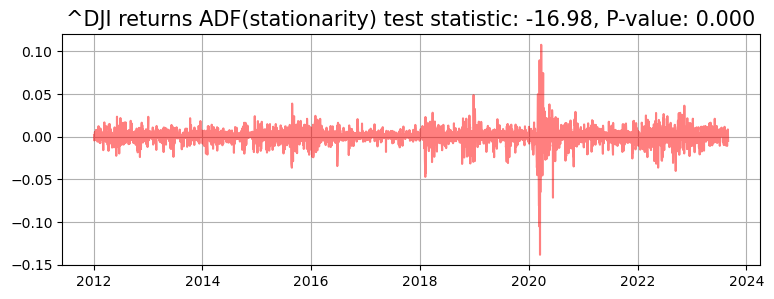

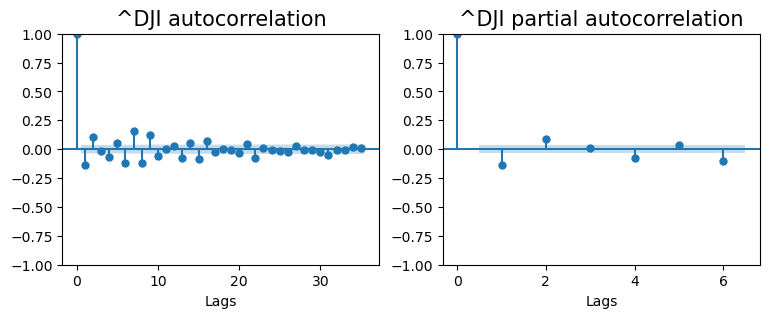

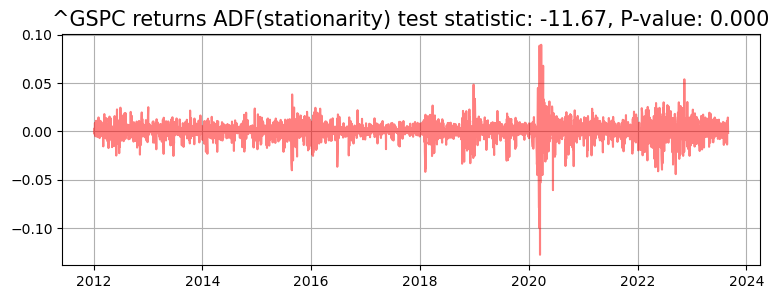

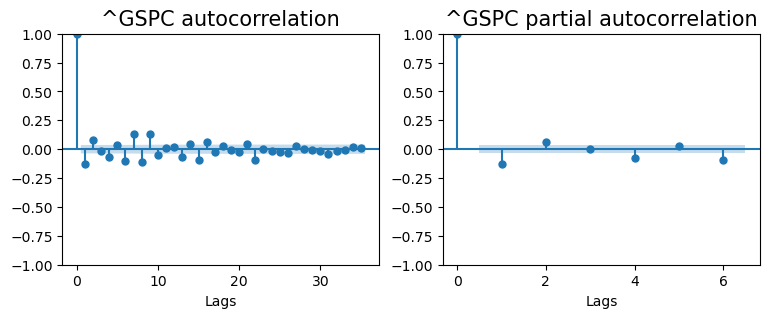

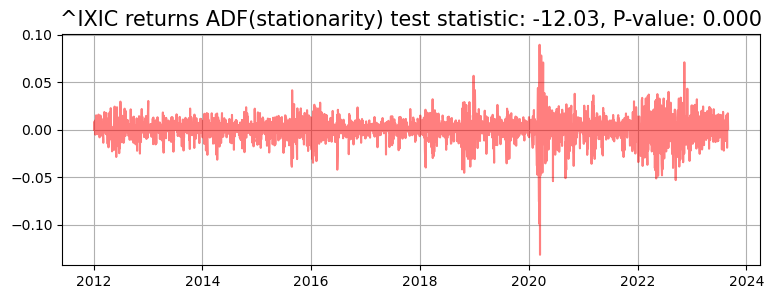

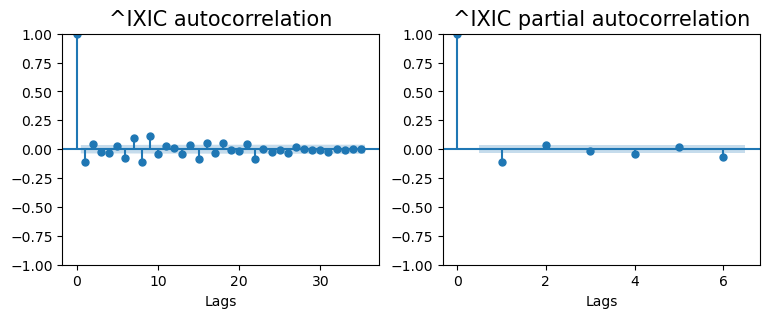

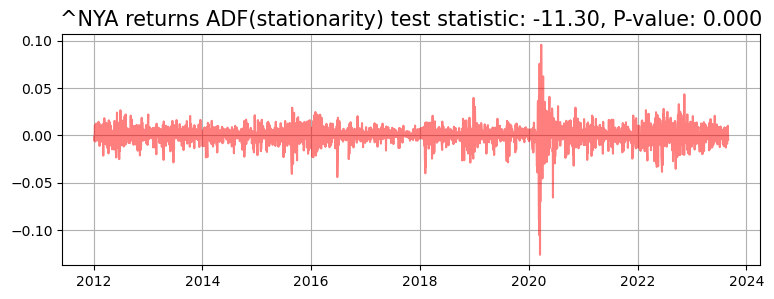

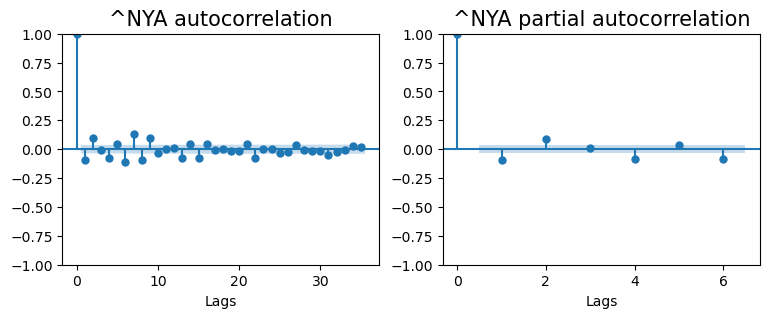

In [6]:
for col in return_df.columns:
    Ser = return_df[col]
    Ser_name = col
    plot_ADF(Ser, Ser_name, threshold = 0.05)
    

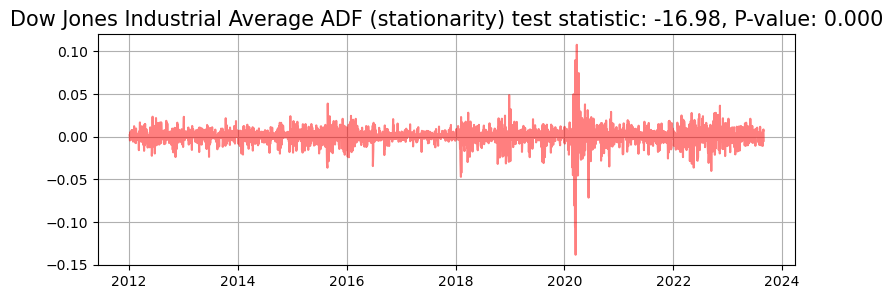

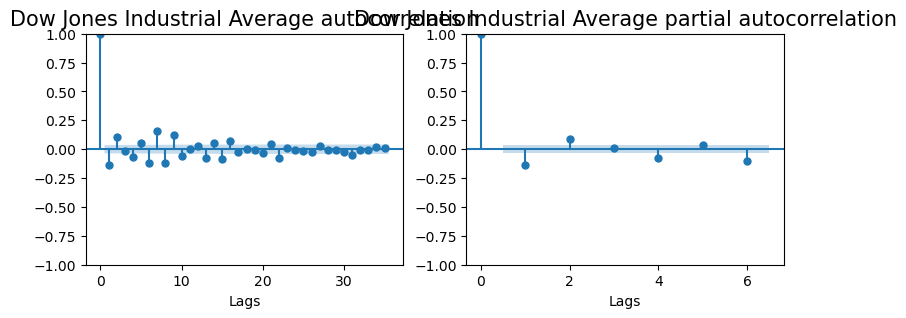

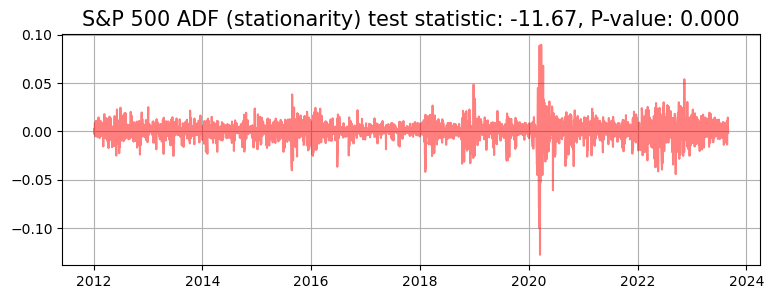

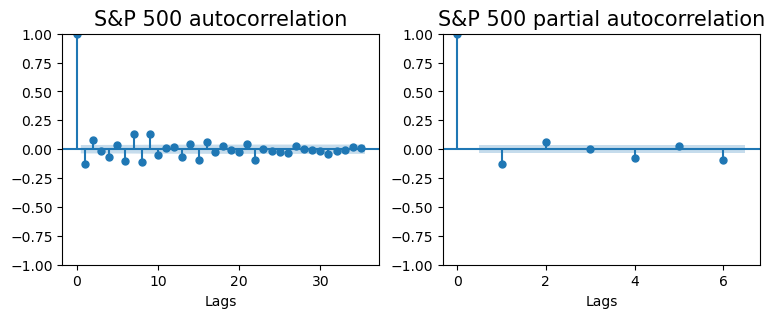

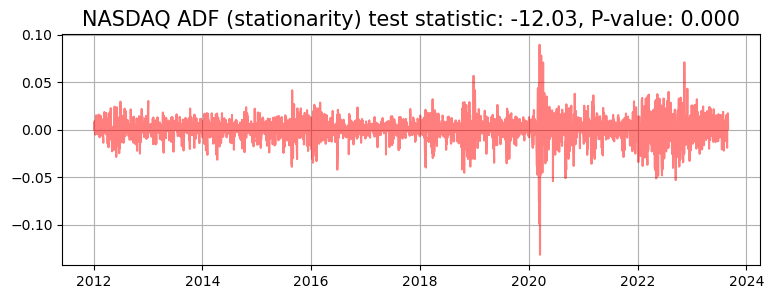

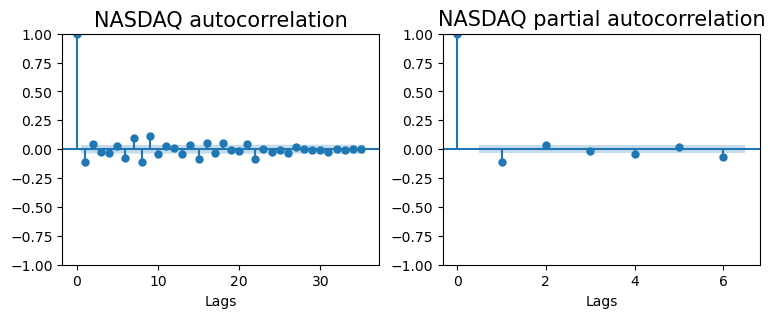

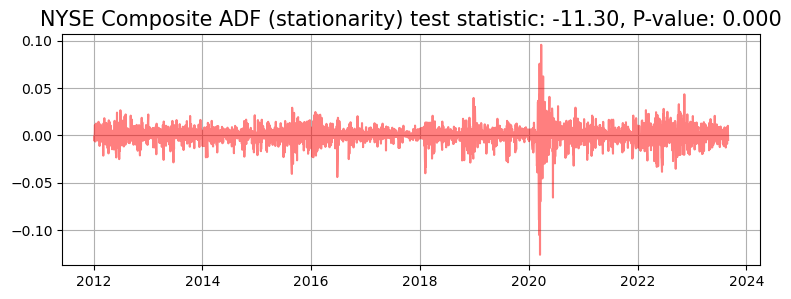

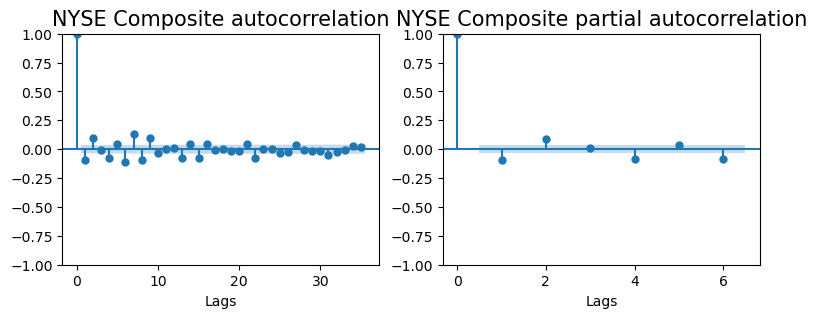

In [ ]:
# Visualize the original sequence
def plot_ADF(Ser, Ser_name, threshold=0.05):
    # The difference order is initialized to 0
    # Perform a stationarity (ADF) test on the original sequence
    # if the sequence is not stable
    # then make a difference until the difference reaches a stationary sequence
    diff = 0
    while True:
        if diff == 0:
            temp_Ser = Ser.copy()
        else:
            temp_Ser = temp_Ser.diff().dropna()
        res = adfuller(temp_Ser)
        adf_statistic, p_value, usedlag, nobs, critical, icbest = res
        plt.figure(figsize=(9, 3))
        plt.plot(temp_Ser.index, temp_Ser, c='r', alpha=0.5)
        plt.grid()

        # The null hypothesis of the ADF test is that the sequence is not stationary
        # When the P value is less than 0.05
        # the null hypothesis is rejected and considered stable
        # otherwise it is considered unstable
        if diff == 0:
            title = "{} ADF (stationarity) test statistic: {:.2f}, P-value: {:.3f}".format(
                stock_names.get(Ser_name, Ser_name), adf_statistic, p_value)
        else:
            title = "{} ADF (stationarity) test statistic after {} difference: {:.2f}, P-value: {:.3f}".format(
                stock_names.get(Ser_name, Ser_name), diff, adf_statistic, p_value)

        # Plot autocorrelation and partial autocorrelation plots for stationary series
        plt.title(title, fontsize=15)
        plt.show()
        if p_value < threshold:
            plt.figure(figsize=(9, 3))
            plot_acf(temp_Ser, ax=plt.subplot(121))
            if diff == 0:
                title = "{} autocorrelation".format(stock_names.get(Ser_name, Ser_name))
            else:
                title = "{} autocorrelation after difference of order {}".format(
                    stock_names.get(Ser_name, Ser_name), diff)
            plt.title(title, fontsize=15)
            plt.xlabel("Lags")

            plot_pacf(temp_Ser, lags=6, ax=plt.subplot(122))
            plt.title(title.replace("autocorrelation", 'partial autocorrelation'), fontsize=15)
            plt.xlabel("Lags")

            plt.show()
            break
        diff += 1

for col in return_df.columns:
    Ser = return_df[col]
    Ser_name = col
    plot_ADF(Ser, Ser_name, threshold=0.05)


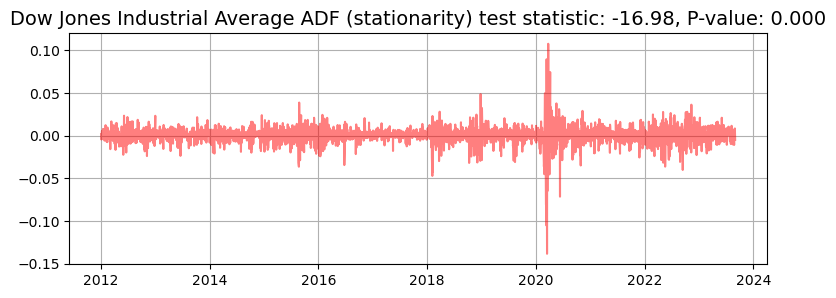

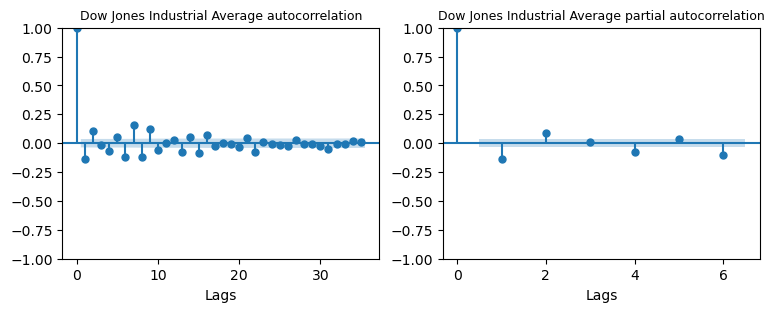

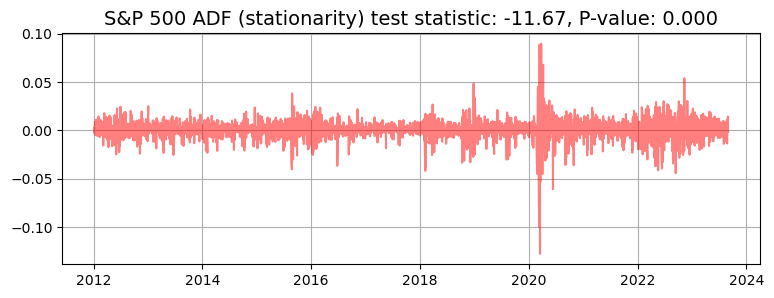

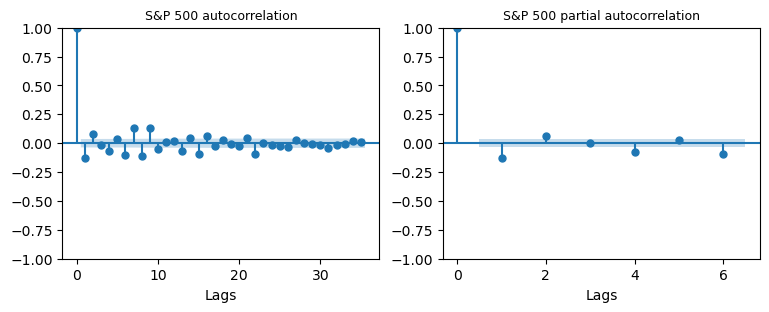

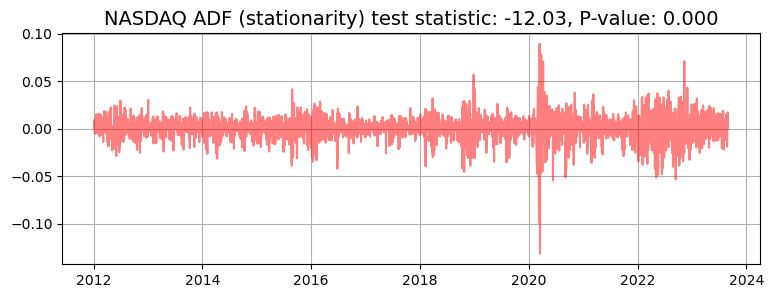

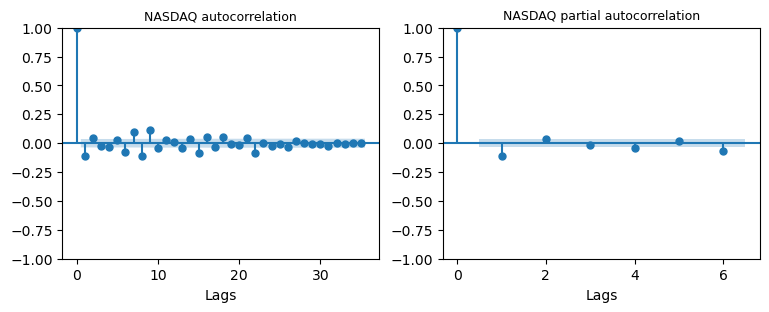

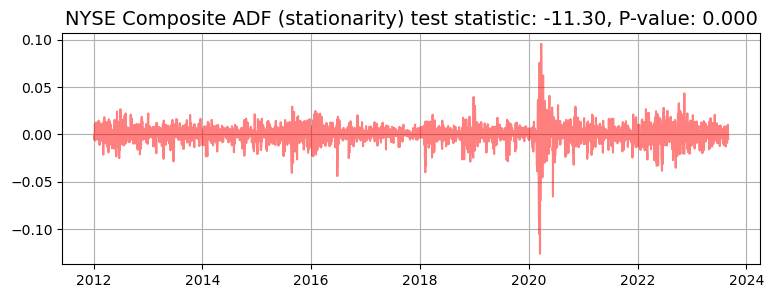

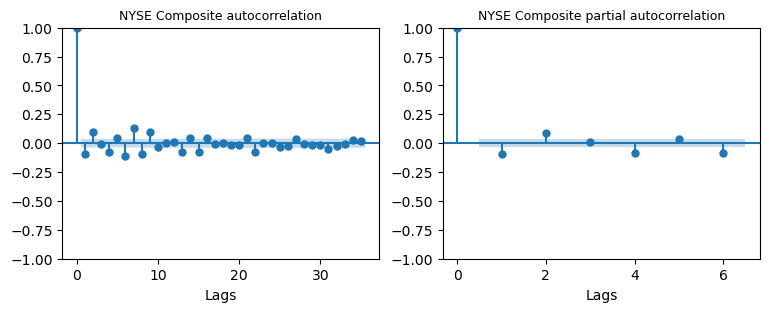

In [ ]:
# Visualize the original sequence
def plot_ADF(Ser, Ser_name, threshold=0.05):
    # The difference order is initialized to 0
    # Perform a stationarity (ADF) test on the original sequence
    # if the sequence is not stable
    # then make a difference until the difference reaches a stationary sequence
    diff = 0
    while True:
        if diff == 0:
            temp_Ser = Ser.copy()
        else:
            temp_Ser = temp_Ser.diff().dropna()
        res = adfuller(temp_Ser)
        adf_statistic, p_value, usedlag, nobs, critical, icbest = res
        plt.figure(figsize=(9, 3))
        plt.plot(temp_Ser.index, temp_Ser, c='r', alpha=0.5)
        plt.grid()

        # The null hypothesis of the ADF test is that the sequence is not stationary
        # When the P value is less than 0.05
        # the null hypothesis is rejected and considered stable
        # otherwise it is considered unstable
        if diff == 0:
            title = "{} ADF (stationarity) test statistic: {:.2f}, P-value: {:.3f}".format(
                stock_names.get(Ser_name, Ser_name), adf_statistic, p_value)
        else:
            title = "{} ADF (stationarity) test statistic after {} difference: {:.2f}, P-value: {:.3f}".format(
                stock_names.get(Ser_name, Ser_name), diff, adf_statistic, p_value)

        # Plot autocorrelation and partial autocorrelation plots for stationary series
        plt.title(title, fontsize=14)  # Reduce the font size
        plt.show()
        if p_value < threshold:
            plt.figure(figsize=(9, 3))
            plot_acf(temp_Ser, ax=plt.subplot(121))
            if diff == 0:
                title = "{} autocorrelation".format(stock_names.get(Ser_name, Ser_name))
            else:
                title = "{} autocorrelation after difference of order {}".format(
                    stock_names.get(Ser_name, Ser_name), diff)
            plt.title(title, fontsize=9)  # Reduce the font size
            plt.xlabel("Lags")

            plot_pacf(temp_Ser, lags=6, ax=plt.subplot(122))
            plt.title(title.replace("autocorrelation", 'partial autocorrelation'), fontsize=9)  # Reduce the font size
            plt.xlabel("Lags")

            plt.show()
            break
        diff += 1

for col in return_df.columns:
    Ser = return_df[col]
    Ser_name = col
    plot_ADF(Ser, Ser_name, threshold=0.05)


# 3 Decentralized Assets for Model Fitting

### After trying to fit all assets to the model at one time, it was found that it was not possible to fit all assets while importing the same length of historical data. Therefore, assets are dispersed for model fitting.

### And we know from the above ADF test that all stock return data are stationary sequences, so we can directly start ARIMA model fitting.

## 3.1 ARMA_1

In [ ]:
# startDateStr = '2022-01-01'
# endDateStr = '2023-09-01'
# instrumentIds = ["NVDA","META","XOM"]

# data = yf.download(instrumentIds, start=startDateStr, end=endDateStr)['Adj Close']
# data = data.fillna(method='ffill')  # Forward fill missing values

In [ ]:
# return_df = np.log(data / data.shift(1)).dropna()
# return_df

In [5]:
import yfinance as yf
import yfinance as yf
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa import stattools
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import pmdarima as pm
from pmdarima.arima import auto_arima   

import warnings
warnings.filterwarnings('ignore')
startDateStr = '2012-01-01'
endDateStr = '2023-09-01'
instrumentIds = ["^GSPC", "^IXIC", "^DJI", "^NYA"]

data = yf.download(instrumentIds, start=startDateStr, end=endDateStr)['Adj Close']
data = data.fillna(method='ffill')  # Forward fill missing values
return_df = np.log(data / data.shift(1)).dropna()

# 现在可以继续使用 return_df 进行分析和建模


[*********************100%%**********************]  4 of 4 completed


In [6]:

return_df.tail(587).to_excel('arima real.xlsx')

In [8]:
stock_ARIMA_model = {}
for col in return_df.columns:
    Ser = return_df[col]
    # Build an ARIMA model, use the grid search algorithm to search for the best model order, and use AIC as a model evaluation index
    model = auto_arima(Ser, start_p=0, start_q=0, max_p=5, max_q=5, 
                   error_action='ignore', information_criterion = 'aic')
    if model.order == (0,0,0):
        model = auto_arima(Ser, start_p=1, start_q=1, max_p=5, max_q=5, 
                   error_action='ignore', information_criterion = 'aic')
        
    print("="*80)
    print("="*10, ' '*26, col, ' '*26, '='*10)
    print("="*80)
    
    print(model.summary())
    stock_ARIMA_model[col] = model
    print()
    print()

==========                            ^DJI                            ==========
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2934
Model:               SARIMAX(2, 0, 0)   Log Likelihood                9220.217
Date:                Mon, 25 Sep 2023   AIC                         -18432.433
Time:                        13:58:12   BIC                         -18408.497
Sample:                             0   HQIC                        -18423.814
                               - 2934                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.000      1.757      0.079   -4.19e-05       0.001
ar.L1         -0.1243      0.007    -18.702      0

In [10]:
# Model In-Sample Prediction
dates = return_df.index
ARMA_pred_df = pd.DataFrame() 
for col in return_df.columns:
    model = stock_ARIMA_model[col]
    predict_in_sample = model.predict_in_sample() 
    predict_ser = pd.Series(predict_in_sample, index = dates, name = col)
    ARMA_pred_df[col] = predict_ser
    
ARMA_pred_df

,^DJI,^GSPC,^IXIC,^NYA
Date,,,,
2012-01-04,0.000350,0.000428,0.000566,0.000000e+00
2012-01-05,0.000166,0.000460,0.000641,1.519895e-04
2012-01-06,0.000537,0.000104,-0.000238,9.276497e-08
2012-01-09,0.000904,0.000945,0.000730,3.453695e-04
2012-01-10,-0.000356,0.000024,0.000573,-7.950941e-04
...,...,...,...,...
2023-08-25,0.002180,0.002786,0.003138,1.507841e-03
2023-08-28,-0.001478,-0.001184,-0.001057,-1.238224e-03
2023-08-29,0.000219,0.000087,0.000078,-1.543074e-04


In [11]:
ARMA_pred_df

,^DJI,^GSPC,^IXIC,^NYA
Date,,,,
2012-01-04,0.000350,0.000428,0.000566,0.000000e+00
2012-01-05,0.000166,0.000460,0.000641,1.519895e-04
2012-01-06,0.000537,0.000104,-0.000238,9.276497e-08
2012-01-09,0.000904,0.000945,0.000730,3.453695e-04
2012-01-10,-0.000356,0.000024,0.000573,-7.950941e-04
...,...,...,...,...
2023-08-25,0.002180,0.002786,0.003138,1.507841e-03
2023-08-28,-0.001478,-0.001184,-0.001057,-1.238224e-03
2023-08-29,0.000219,0.000087,0.000078,-1.543074e-04


In [12]:
ARMA_pred_df_tail = ARMA_pred_df.tail(587)


In [13]:
ARMA_pred_df_tail

,^DJI,^GSPC,^IXIC,^NYA
Date,,,,
2021-05-04,-0.000981,-0.000316,0.000793,-0.001402
2021-05-05,0.000897,0.001446,0.002393,0.000758
2021-05-06,0.000059,-0.000033,0.000297,-0.000507
2021-05-07,-0.000541,-0.000505,0.000083,-0.000273
2021-05-10,0.000341,0.000037,-0.000163,-0.000098
...,...,...,...,...
2023-08-25,0.002180,0.002786,0.003138,0.001508
2023-08-28,-0.001478,-0.001184,-0.001057,-0.001238
2023-08-29,0.000219,0.000087,0.000078,-0.000154


In [14]:
ARMA_pred_df_tail.to_excel('arima 5.4-8.31.xlsx')

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



# 计算每个股票的 MAE、RMSE、R-squared 和 MSE
mae_list = []
rmse_list = []
r2_list = []
mse_list = []

for col in ARMA_pred_df_tail.columns:
    actual_values = return_df[col].tail(587)
    predicted_values = ARMA_pred_df_tail[col]
    
    # 计算 MAE
    mae = mean_absolute_error(actual_values, predicted_values)
    mae_list.append(mae)
    
    # 计算 RMSE
    rmse = mean_squared_error(actual_values, predicted_values, squared=False)
    rmse_list.append(rmse)
    
 
    
    # 计算 MSE
    mse = mean_squared_error(actual_values, predicted_values)
    mse_list.append(mse)

# 创建一个数据框存储性能指标
performance_df = pd.DataFrame({
    'Stock': ARMA_pred_df_tail.columns,
    'MAE': mae_list,
    'RMSE': rmse_list,
    'MSE': mse_list
})

# 打印性能指标数据框
print("Performance Metrics:")
print(performance_df)



Performance Metrics:
   Stock       MAE      RMSE       MSE
0   ^DJI  0.007645  0.010171  0.000103
1  ^GSPC  0.008936  0.011882  0.000141
2  ^IXIC  0.011872  0.015607  0.000244
3   ^NYA  0.008043  0.010569  0.000112


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

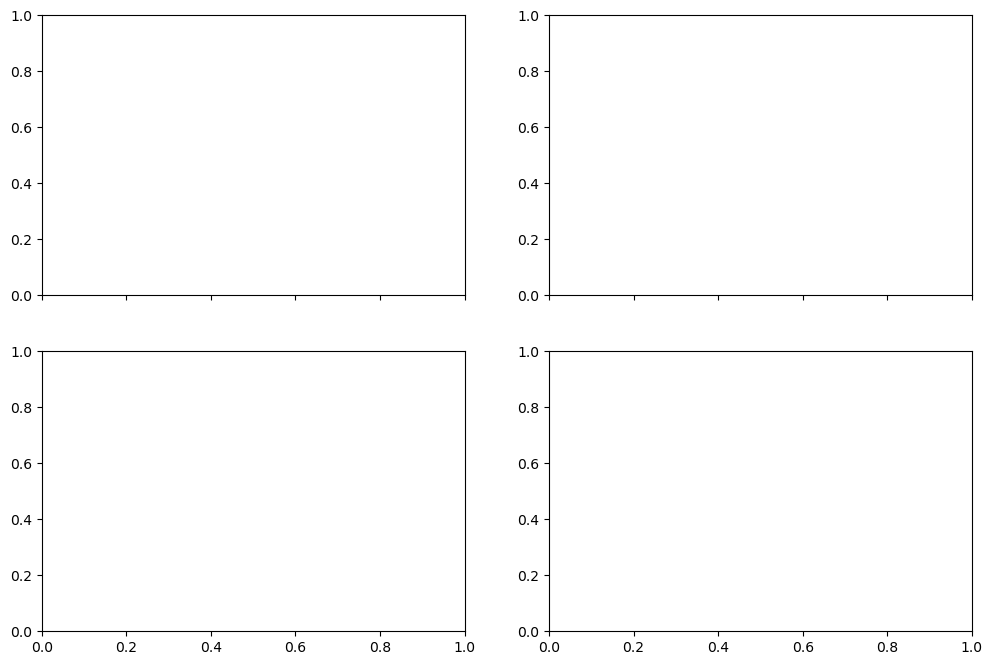

In [25]:


# 创建一个字典，将股票代码映射到股票名称
stock_names = {
    "^GSPC": "S&P 500",
    "^IXIC": "NASDAQ",
    "^DJI": "Dow Jones Industrial Average",
    "^NYA": "NYSE Composite"
}

# 创建一个4x1的子图布局
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

# 遍历每个股票并绘制预测结果和实际值
for i, col in enumerate(ARMA_pred_df.columns):
    actual_values = return_df[col].tail(587)
    predicted_values = ARMA_pred_df_tail[col]
    
    # 获取股票名称
    stock_name = stock_names.get(col, col)
    
    # 绘制子图
    ax = axes[i]
    ax.plot(actual_values.index, actual_values.values, label='Actual Returns', color='blue')
    ax.plot(actual_values.index, predicted_values, label='Predicted Returns', color='red')
    ax.set_ylabel('Returns')
    ax.set_title(f'Stock Returns Prediction for {stock_name}')
    ax.legend()

# 设置共享x轴标签
axes[-1].set_xlabel('Date')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()


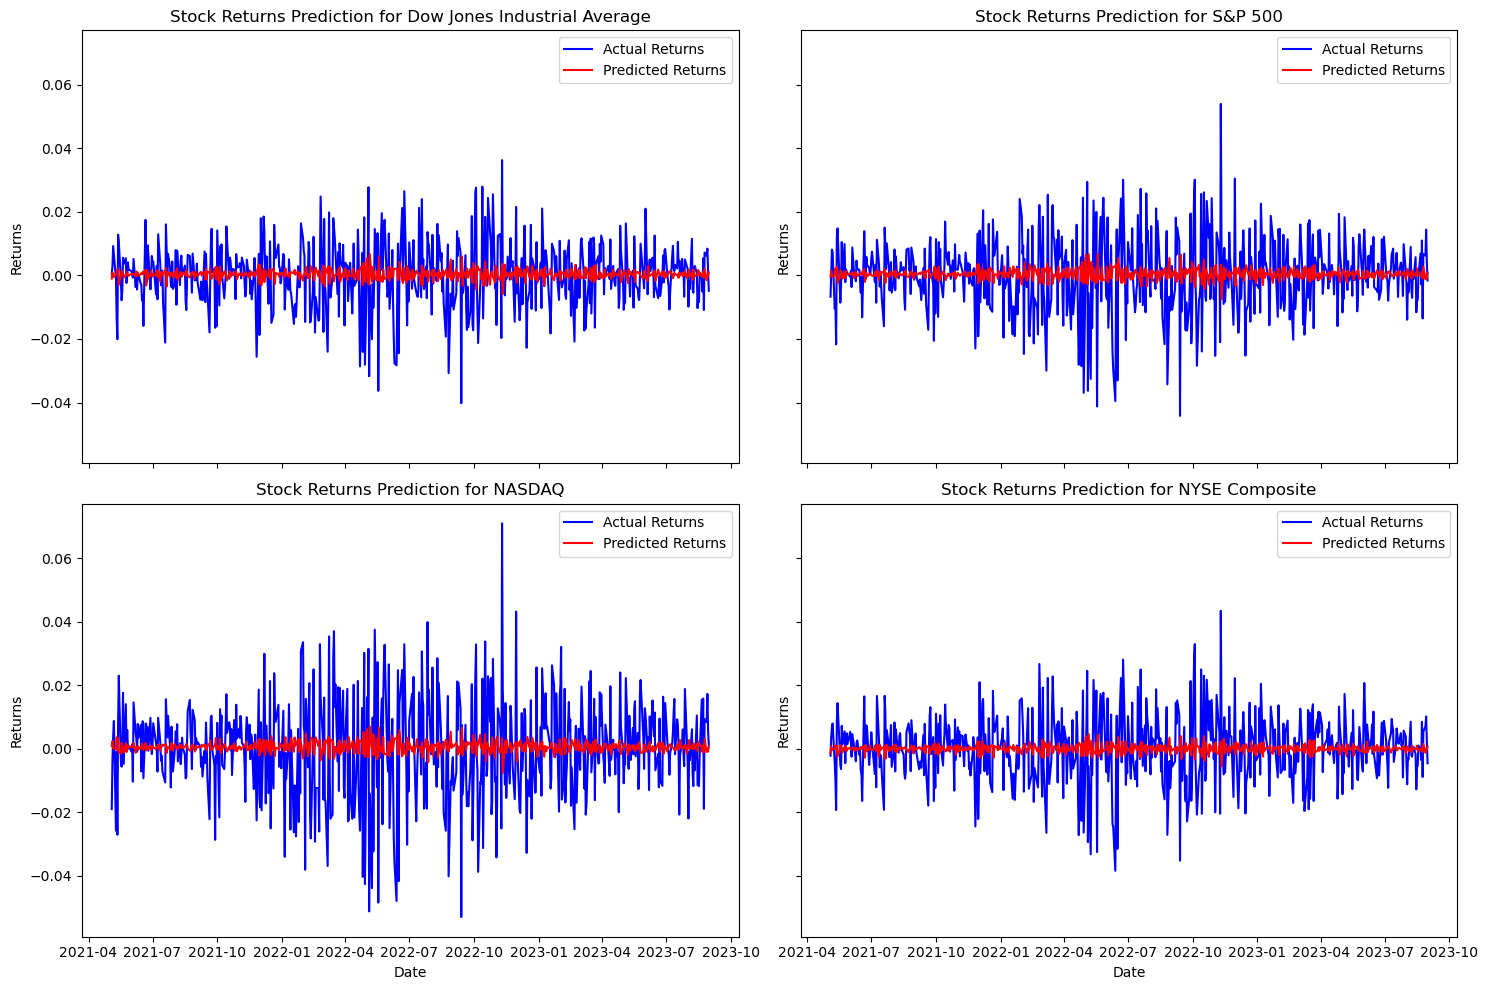

In [29]:
# 创建一个字典，将股票代码映射到股票名称
stock_names = {
    "^GSPC": "S&P 500",
    "^IXIC": "NASDAQ",
    "^DJI": "Dow Jones Industrial Average",
    "^NYA": "NYSE Composite"
}

# 创建一个2x2的子图布局
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# 遍历每个股票并绘制预测结果和实际值
for i, col in enumerate(ARMA_pred_df.columns):
    actual_values = return_df[col].tail(587)
    predicted_values = ARMA_pred_df_tail[col]
    
    # 获取股票名称
    stock_name = stock_names.get(col, col)
    
    # 计算当前子图的行和列索引
    row_index = i // 2
    col_index = i % 2
    
    # 绘制子图
    ax = axes[row_index][col_index]
    ax.plot(actual_values.index, actual_values.values, label='Actual Returns', color='blue')
    ax.plot(actual_values.index, predicted_values, label='Predicted Returns', color='red')
    ax.set_ylabel('Returns')
    ax.set_title(f'Stock Returns Prediction for {stock_name}')
    ax.legend()

# 设置共享x轴和y轴标签
for ax in axes[-1]:
    ax.set_xlabel('Date')
for ax in axes[:, 0]:
    ax.set_ylabel('Returns')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()


   Stock       MSE       R^2
0  ^GSPC  0.000109  0.025845
1  ^IXIC  0.000113  0.020755
2   ^DJI  0.000159  0.012852
3   ^NYA  0.000107  0.015972


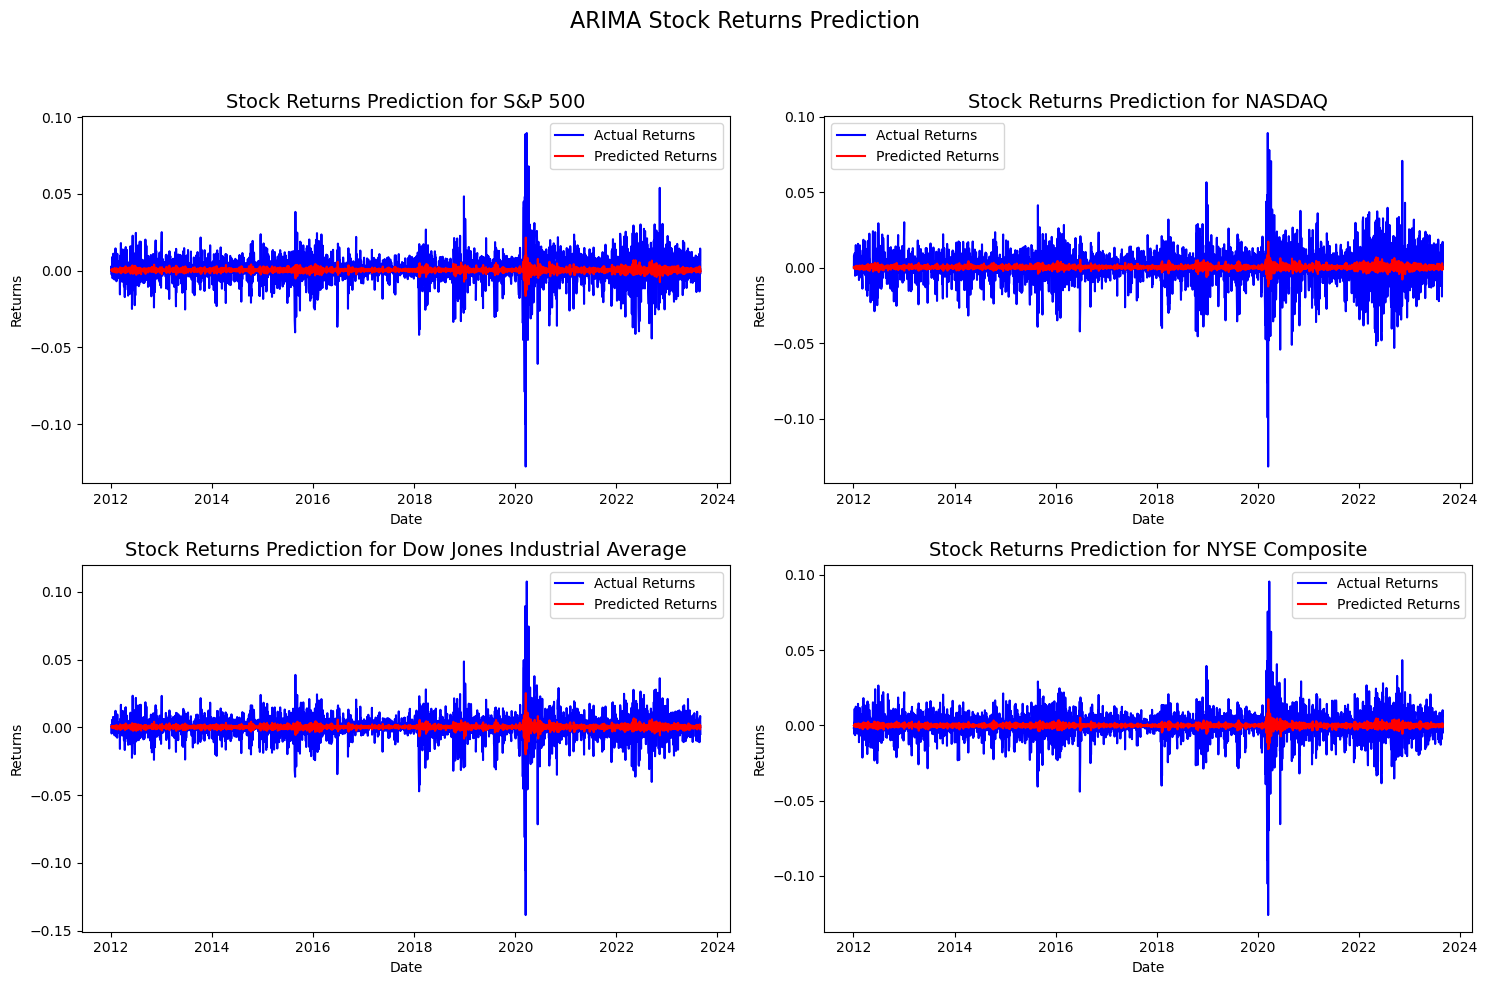

In [ ]:
# Create a single figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('ARIMA Stock Returns Prediction', fontsize=16)  # Modify the main title

for i in range(len(instrumentIds)):
    row = i // 2
    col = i % 2

    # Modify stock code to stock name
    stock_name = stock_names.get(instrumentIds[i], instrumentIds[i])

    Ser = return_df[instrumentIds[i]]

    # Build an ARIMA model, use the grid search algorithm to search for the best model order, and use AIC as a model evaluation index
    model = stock_ARIMA_model[instrumentIds[i]]
    predict_in_sample = model.predict_in_sample()
    predict_ser = pd.Series(predict_in_sample, index=dates, name=instrumentIds[i])

    # Visualize the prediction results
    axes[row, col].plot(dates, Ser, label='Actual Returns', color='blue')
    axes[row, col].plot(dates, predict_ser, label='Predicted Returns', color='red')
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Returns')
    axes[row, col].set_title(f'Stock Returns Prediction for {stock_name}', fontsize=14)  # Modify subplot title
    axes[row, col].legend()

# Adjust layout for subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Create a DataFrame with results
results_df = pd.DataFrame({'Stock': instrumentIds, 'MSE': mse_list, 'R^2': r2_list})

# Print the DataFrame with results
print(results_df)

# Show the combined plot
plt.show()


   Stock       MSE       R^2
0  ^GSPC  0.000109  0.025845
1  ^IXIC  0.000113  0.020755
2   ^DJI  0.000159  0.012852
3   ^NYA  0.000107  0.015972


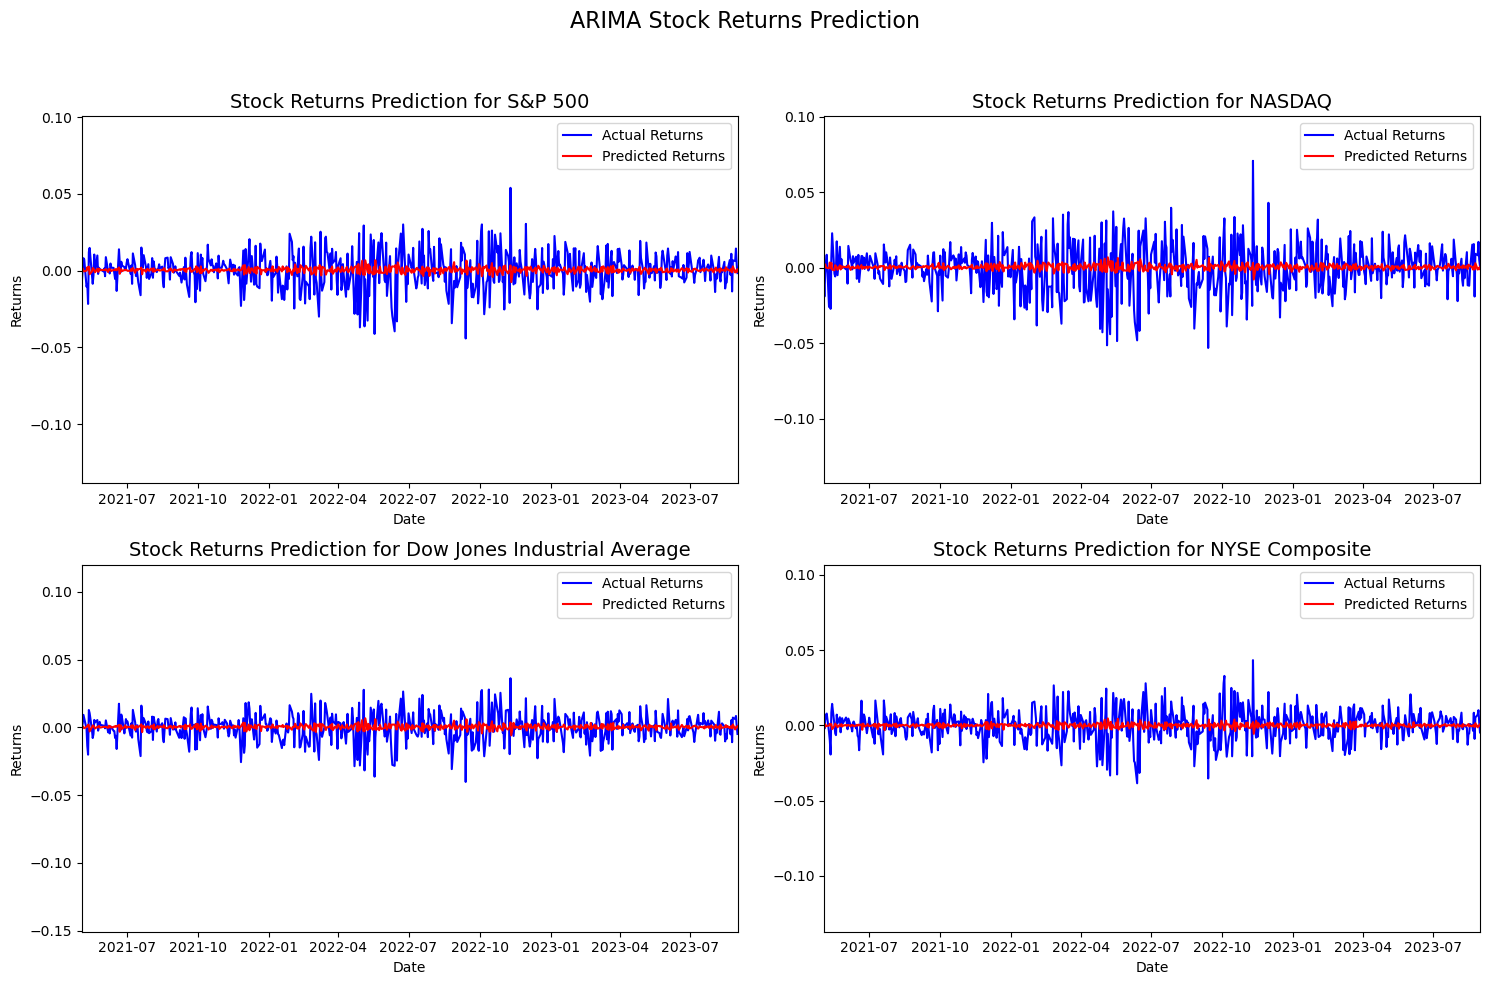

In [ ]:
from datetime import datetime
# Create a single figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('ARIMA Stock Returns Prediction', fontsize=16)  # Modify the main title

# ...

for i in range(len(instrumentIds)):
    row = i // 2
    col = i % 2

    # Modify stock code to stock name
    stock_name = stock_names.get(instrumentIds[i], instrumentIds[i])

    Ser = return_df[instrumentIds[i]]

    # Build an ARIMA model, use the grid search algorithm to search for the best model order, and use AIC as a model evaluation index
    model = stock_ARIMA_model[instrumentIds[i]]
    predict_in_sample = model.predict_in_sample()
    predict_ser = pd.Series(predict_in_sample, index=dates, name=instrumentIds[i])

    # Visualize the prediction results
    axes[row, col].plot(dates, Ser, label='Actual Returns', color='blue')
    axes[row, col].plot(dates, predict_ser, label='Predicted Returns', color='red')
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Returns')
    axes[row, col].set_xlim(datetime(2021, 5, 4), datetime(2023, 8, 31))  # Set x-axis limits with datetime objects
    axes[row, col].set_title(f'Stock Returns Prediction for {stock_name}', fontsize=14)  # Modify subplot title
    axes[row, col].legend()

# ...
# Adjust layout for subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Create a DataFrame with results
results_df = pd.DataFrame({'Stock': instrumentIds, 'MSE': mse_list, 'R^2': r2_list})

# Print the DataFrame with results
print(results_df)

# Show the combined plot
plt.show()

## ARIMA_Prediction_1

In [ ]:
# Function to forecast multiple stocks
def forecast_stocks(model_dict, data_df, forecast_days):
    forecast_dict = {}
    for col in data_df.columns:
        model = model_dict[col]
        out_of_sample_pred = model.predict(forecast_days)
        forecast_dict[col] = out_of_sample_pred.tolist()  # Assuming the prediction is in a format that can be converted to a list

    # Convert the forecast dictionary to a DataFrame
    forecast_df = pd.DataFrame.from_dict(forecast_dict)
    
    return forecast_df

# Forecast for the next 30 days
forecast_days = 30
forecast_results_1_df = forecast_stocks(stock_ARIMA_model, return_df, forecast_days)
forecast_results_1_df

,^DJI,^GSPC,^IXIC,^NYA
0,0.001057,0.000882,0.000685,5.773583e-04
1,-0.000187,0.000251,0.000573,-4.508476e-04
2,0.000477,0.000477,0.000569,8.940188e-05
3,0.000287,0.000412,0.000566,-4.699661e-05
4,0.000368,0.000433,0.000566,1.186170e-05
5,0.000342,0.000427,0.000566,-5.119797e-06
6,0.000352,0.000429,0.000566,1.476881e-06
7,0.000349,0.000428,0.000566,-5.737906e-07
8,0.000350,0.000428,0.000566,1.783538e-07
9,0.000349,0.000428,0.000566,-6.542133e-08


In [ ]:
import pandas as pd

# 创建一个包含每个指数的DataFrame
data_dji = {
    'Index': '^DJI',
    'Dep. Variable': 'y',
    'Model': 'SARIMAX(2, 0, 0)',
    'Log Likelihood': 9220.217,
    'AIC': -18432.433,
    'BIC': -18408.497,
    'Sample': '0 - 2934',
    'Covariance Type': 'opg'
}

data_gspc = {
    'Index': '^GSPC',
    'Dep. Variable': 'y',
    'Model': 'SARIMAX(2, 0, 0)',
    'Log Likelihood': 9164.908,
    'AIC': -18321.816,
    'BIC': -18297.879,
    'Sample': '0 - 2934',
    'Covariance Type': 'opg'
}

data_ixic = {
    'Index': '^IXIC',
    'Dep. Variable': 'y',
    'Model': 'SARIMAX(2, 0, 0)',
    'Log Likelihood': 8664.940,
    'AIC': -17321.880,
    'BIC': -17297.944,
    'Sample': '0 - 2934',
    'Covariance Type': 'opg'
}

data_nya = {
    'Index': '^NYA',
    'Dep. Variable': 'y',
    'Model': 'SARIMAX(2, 0, 0)',
    'Log Likelihood': 9255.165,
    'AIC': -18504.330,
    'BIC': -18486.378,
    'Sample': '0 - 2934',
    'Covariance Type': 'opg'
}

df_dji = pd.DataFrame(data_dji, index=[0])
df_gspc = pd.DataFrame(data_gspc, index=[0])
df_ixic = pd.DataFrame(data_ixic, index=[0])
df_nya = pd.DataFrame(data_nya, index=[0])

# 合并所有DataFrame
result = pd.concat([df_dji, df_gspc, df_ixic, df_nya], keys=['^DJI', '^GSPC', '^IXIC', '^NYA'])

# 重置索引并显示结果
result.reset_index(level=0, inplace=True)
result.rename(columns={'level_0': 'Index'}, inplace=True)
result.index = range(1, len(result) + 1)

print(result)


   Index  Index Dep. Variable             Model  Log Likelihood        AIC  \
1   ^DJI   ^DJI             y  SARIMAX(2, 0, 0)        9220.217 -18432.433   
2  ^GSPC  ^GSPC             y  SARIMAX(2, 0, 0)        9164.908 -18321.816   
3  ^IXIC  ^IXIC             y  SARIMAX(2, 0, 0)        8664.940 -17321.880   
4   ^NYA   ^NYA             y  SARIMAX(2, 0, 0)        9255.165 -18504.330   

         BIC    Sample Covariance Type  
1 -18408.497  0 - 2934             opg  
2 -18297.879  0 - 2934             opg  
3 -17297.944  0 - 2934             opg  
4 -18486.378  0 - 2934             opg  


In [ ]:
result

,Index,Index,Dep. Variable,Model,Log Likelihood,AIC,BIC,Sample,Covariance Type
1,^DJI,^DJI,y,"SARIMAX(2, 0, 0)",9220.217,-18432.433,-18408.497,0 - 2934,opg
2,^GSPC,^GSPC,y,"SARIMAX(2, 0, 0)",9164.908,-18321.816,-18297.879,0 - 2934,opg
3,^IXIC,^IXIC,y,"SARIMAX(2, 0, 0)",8664.940,-17321.880,-17297.944,0 - 2934,opg
4,^NYA,^NYA,y,"SARIMAX(2, 0, 0)",9255.165,-18504.330,-18486.378,0 - 2934,opg


# ========================================================================

## 3.2 ARIMA_2

In [ ]:
startDateStr = '2020-01-01'
endDateStr = '2023-09-01'
instrumentIds = ["AAPL","AMD","TSLA","GOOGL","TSM"]

data = yf.download(instrumentIds, start=startDateStr, end=endDateStr)['Adj Close']
data = data.fillna(method='ffill')  # Forward fill missing values

[*********************100%%**********************]  5 of 5 completed


In [ ]:
return_df = np.log(data / data.shift(1)).dropna()
return_df.head()

,AAPL,AMD,GOOGL,TSLA,TSM
Date,,,,,
2020-01-03,-0.009770,-0.010236,-0.005245,0.029203,-0.033534
2020-01-06,0.007936,-0.004330,0.026305,0.019072,-0.011607
2020-01-07,-0.004714,-0.002897,-0.001933,0.038067,0.016075
2020-01-08,0.015958,-0.008743,0.007092,0.048033,0.007346
2020-01-09,0.021018,0.023555,0.010443,-0.022189,0.008137


In [ ]:
stock_ARIMA_model = {}
for col in return_df.columns:
    Ser = return_df[col]
    # Build an ARIMA model, use the grid search algorithm to search for the best model order, and use AIC as a model evaluation index
    model = auto_arima(Ser, start_p=0, start_q=0, max_p=5, max_q=5, 
                   error_action='ignore', information_criterion = 'aic')
    if model.order == (0,0,0):
        model = auto_arima(Ser, start_p=1, start_q=1, max_p=5, max_q=5, 
                   error_action='ignore', information_criterion = 'aic')
        
    print("="*80)
    print("="*10, ' '*26, col, ' '*26, '='*10)
    print("="*80)
    
    print(model.summary())
    stock_ARIMA_model[col] = model
    print()
    print()

==========                            AAPL                            ==========
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  922
Model:               SARIMAX(1, 0, 0)   Log Likelihood                2228.282
Date:                Tue, 19 Sep 2023   AIC                          -4450.563
Time:                        17:57:13   BIC                          -4436.083
Sample:                             0   HQIC                         -4445.038
                                - 922                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.001      1.634      0.102      -0.000       0.003
ar.L1         -0.1380      0.021     -6.538      0

In [ ]:
# Model In-Sample Prediction
dates = return_df.index
ARMA_pred_df = pd.DataFrame() 
for col in return_df.columns:
    model = stock_ARIMA_model[col]
    predict_in_sample = model.predict_in_sample() 
    predict_ser = pd.Series(predict_in_sample, index = dates, name = col)
    ARMA_pred_df[col] = predict_ser
    
ARMA_pred_df

,AAPL,AMD,GOOGL,TSLA,TSM
Date,,,,,
2020-01-03,0.001024,0.000000,0.000000,0.002383,0.000000
2020-01-06,0.002513,0.000878,0.000583,0.002383,0.004573
2020-01-07,0.000070,0.000371,-0.002923,0.002383,0.001583
2020-01-08,0.001816,0.000249,0.000215,0.002383,-0.002192
2020-01-09,-0.001036,0.000750,-0.000788,0.002383,-0.001002
...,...,...,...,...,...
2023-08-25,0.004824,0.006200,0.002196,0.002383,0.002468
2023-08-28,-0.000568,-0.000378,-0.000086,0.002383,-0.000837
2023-08-29,-0.000050,-0.000301,-0.000963,0.002383,-0.001312


In [ ]:
# 创建一个空的数据框来存储均方误差
mse_df = pd.DataFrame(columns=['Stock', 'MSE'])

# 遍历每个股票
for col in ARMA_pred_df.columns:
    # 计算均方误差
    actual_values = return_df[col]
    predicted_values = ARMA_pred_df[col]
    mse = ((actual_values - predicted_values) ** 2).mean()
    
    # 将均方误差存储在数据框中
    mse_df = pd.concat([mse_df, pd.DataFrame({'Stock': [col], 'MSE': [mse]})], ignore_index=True)

# 打印均方误差数据框
print(mse_df)

   Stock       MSE
0   AAPL  0.000466
1    AMD  0.001165
2  GOOGL  0.000455
3   TSLA  0.001926
4    TSM  0.000581


## ARIMA_Prediction_2

In [ ]:
# Function to forecast multiple stocks
def forecast_stocks(model_dict, data_df, forecast_days):
    forecast_dict = {}
    for col in data_df.columns:
        model = model_dict[col]
        out_of_sample_pred = model.predict(forecast_days)
        forecast_dict[col] = out_of_sample_pred.tolist()  # Assuming the prediction is in a format that can be converted to a list

    # Convert the forecast dictionary to a DataFrame
    forecast_df = pd.DataFrame.from_dict(forecast_dict)
    
    return forecast_df

# Forecast for the next 30 days
forecast_days = 30
forecast_results_2_df = forecast_stocks(stock_ARIMA_model, return_df, forecast_days)
forecast_results_2_df

,AAPL,AMD,GOOGL,TSLA,TSM
0,0.001004,7.030208e-04,-2.369165e-04,0.002383,1.752177e-03
1,0.001027,-6.030559e-05,2.632820e-05,0.002383,-2.389467e-04
2,0.001024,5.173054e-06,-2.925817e-06,0.002383,3.258547e-05
3,0.001024,-4.437480e-07,3.251420e-07,0.002383,-4.443723e-06
4,0.001024,3.806500e-08,-3.613259e-08,0.002383,6.059963e-07
5,0.001024,-3.265241e-09,4.015365e-09,0.002383,-8.264051e-08
6,0.001024,2.800945e-10,-4.462220e-10,0.002383,1.126979e-08
7,0.001024,-2.402669e-11,4.958803e-11,0.002383,-1.536876e-09
8,0.001024,2.061026e-12,-5.510650e-12,0.002383,2.095858e-10
9,0.001024,-1.767961e-13,6.123909e-13,0.002383,-2.858149e-11


In [ ]:
# Store the predicted values in df2
df2 = pd.DataFrame(forecast_results_2_df)

## 3.3 ARIMA_3

### Stocks = ["DELL","AMZN"]

In [ ]:
startDateStr = '2023-01-01'
endDateStr = '2023-09-01'
instrumentIds = ["DELL","AMZN"]

data = yf.download(instrumentIds, start=startDateStr, end=endDateStr)['Adj Close']
data = data.fillna(method='ffill')  # Forward fill missing values

[*********************100%%**********************]  2 of 2 completed


In [ ]:
return_df = np.log(data / data.shift(1)).dropna()
return_df.head()

,AMZN,DELL
Date,,
2023-01-04,-0.007955,0.000977
2023-01-05,-0.024012,-0.001711
2023-01-06,0.034992,0.037224
2023-01-09,0.014760,-0.003306
2023-01-10,0.028327,0.004955


In [ ]:
stock_ARIMA_model = {}
for col in return_df.columns:
    Ser = return_df[col]
    # Build an ARIMA model, use the grid search algorithm to search for the best model order, and use AIC as a model evaluation index
    model = auto_arima(Ser, start_p=0, start_q=0, max_p=5, max_q=5, 
                   error_action='ignore', information_criterion = 'aic')
    if model.order == (0,0,0):
        model = auto_arima(Ser, start_p=1, start_q=1, max_p=5, max_q=5, 
                   error_action='ignore', information_criterion = 'aic')
        
    print("="*80)
    print("="*10, ' '*26, col, ' '*26, '='*10)
    print("="*80)
    
    print(model.summary())
    stock_ARIMA_model[col] = model
    print()
    print()

==========                            AMZN                            ==========
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  166
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 403.689
Date:                Tue, 19 Sep 2023   AIC                           -799.377
Time:                        17:57:18   BIC                           -786.929
Sample:                             0   HQIC                          -794.325
                                - 166                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0011      0.001      1.153      0.249      -0.001       0.003
ar.L1          0.5941      0.299      1.990      0

In [ ]:
# Model In-Sample Prediction
dates = return_df.index
ARMA_pred_df = pd.DataFrame() 
for col in return_df.columns:
    model = stock_ARIMA_model[col]
    predict_in_sample = model.predict_in_sample() 
    predict_ser = pd.Series(predict_in_sample, index = dates, name = col)
    ARMA_pred_df[col] = predict_ser
    
ARMA_pred_df

,AMZN,DELL
Date,,
2023-01-04,0.002800,0.002061
2023-01-05,0.004011,0.002061
2023-01-06,0.006929,0.002061
2023-01-09,0.001707,0.002061
2023-01-10,0.000470,0.002061
...,...,...
2023-08-25,0.007399,0.002061
2023-08-28,0.005097,0.002061
2023-08-29,0.004953,0.002061


In [ ]:
# 创建一个空的数据框来存储均方误差
mse_df = pd.DataFrame(columns=['Stock', 'MSE'])

# 遍历每个股票
for col in ARMA_pred_df.columns:
    # 计算均方误差
    actual_values = return_df[col]
    predicted_values = ARMA_pred_df[col]
    mse = ((actual_values - predicted_values) ** 2).mean()
    
    # 将均方误差存储在数据框中
    mse_df = pd.concat([mse_df, pd.DataFrame({'Stock': [col], 'MSE': [mse]})], ignore_index=True)

# 打印均方误差数据框
print(mse_df)

  Stock       MSE
0  AMZN  0.000452
1  DELL  0.000312


## ARIMA_Prediction_3

In [ ]:
# Function to forecast multiple stocks
def forecast_stocks(model_dict, data_df, forecast_days):
    forecast_dict = {}
    for col in data_df.columns:
        model = model_dict[col]
        out_of_sample_pred = model.predict(forecast_days)
        forecast_dict[col] = out_of_sample_pred.tolist()  # Assuming the prediction is in a format that can be converted to a list

    # Convert the forecast dictionary to a DataFrame
    forecast_df = pd.DataFrame.from_dict(forecast_dict)
    
    return forecast_df

# Forecast for the next 30 days
forecast_days = 30
forecast_results_3_df = forecast_stocks(stock_ARIMA_model, return_df, forecast_days)
forecast_results_3_df

,AMZN,DELL
0,0.000593,0.002061
1,0.001489,0.002061
2,0.002021,0.002061
3,0.002337,0.002061
4,0.002525,0.002061
5,0.002637,0.002061
6,0.002703,0.002061
7,0.002742,0.002061
8,0.002766,0.002061
9,0.002780,0.002061


### DELL's historical stock returns are white noise, have no predictive value, and cannot be fitted using an ARIMA model. This value will be deleted in the calculation of the average forecast return rate in the later stage.

In [ ]:
# Store the predicted values in df3
df3 = pd.DataFrame(forecast_results_3_df)

# 4 Export predicted value file

In [ ]:
# Perform the merge operation.
result_df = pd.concat([df1, df2, df3], axis=1)
result_df

,META,NVDA,XOM,AAPL,AMD,GOOGL,TSLA,TSM,AMZN,DELL
0,0.00262,0.002067,0.001494,0.001004,7.030208e-04,-2.369165e-04,0.002383,1.752177e-03,0.000593,0.002061
1,0.00262,0.005000,0.001494,0.001027,-6.030559e-05,2.632820e-05,0.002383,-2.389467e-04,0.001489,0.002061
2,0.00262,0.005641,0.001494,0.001024,5.173054e-06,-2.925817e-06,0.002383,3.258547e-05,0.002021,0.002061
3,0.00262,0.005508,0.001494,0.001024,-4.437480e-07,3.251420e-07,0.002383,-4.443723e-06,0.002337,0.002061
4,0.00262,0.005235,0.001494,0.001024,3.806500e-08,-3.613259e-08,0.002383,6.059963e-07,0.002525,0.002061
5,0.00262,0.005188,0.001494,0.001024,-3.265241e-09,4.015365e-09,0.002383,-8.264051e-08,0.002637,0.002061
6,0.00262,0.005210,0.001494,0.001024,2.800945e-10,-4.462220e-10,0.002383,1.126979e-08,0.002703,0.002061
7,0.00262,0.005235,0.001494,0.001024,-2.402669e-11,4.958803e-11,0.002383,-1.536876e-09,0.002742,0.002061
8,0.00262,0.005238,0.001494,0.001024,2.061026e-12,-5.510650e-12,0.002383,2.095858e-10,0.002766,0.002061
9,0.00262,0.005235,0.001494,0.001024,-1.767961e-13,6.123909e-13,0.002383,-2.858149e-11,0.002780,0.002061


In [ ]:
# Store the 30-day return predicted by the ARIMA model in a csv file named "ARIMA_model_predict_stock_return.csv"
result_df.to_csv('ARIMA_model_predict_stock_return.csv', index=False)